In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl


In [3]:
import pandas as pd
train_t1_tamil=pd.read_csv('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task1-tamil/tamil_offensive_train.tsv',sep='\t')
train_t2_tamil=pd.read_excel('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task2-tamil-english,malayalam-english/train_hasoc_tamil_task2_withlabels.xlsx', engine='openpyxl',names=['id','text','category'])
train_t2_mal=pd.read_excel('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task2-tamil-english,malayalam-english/train_hasoc_mal_task2_withlabels.xlsx', engine='openpyxl')

print(len(train_t1_tamil),len(train_t2_tamil),len(train_t2_mal))

train_t1_tamil=train_t1_tamil.dropna()
train_t2_tamil=train_t2_tamil.dropna()
train_t2_mal=train_t2_mal.dropna()
len(train_t1_tamil),len(train_t2_tamil),len(train_t2_mal)


5880 3999 4000


(5880, 3999, 3999)

In [4]:
train_t2_mal.head()#.category.value_counts()

,ID,Tweets,Labels
0,MA_YT001,Thaankal enthaan cheyyarullath?😛,NOT
1,MA_YT002,Ee theetam WCC feminichigalude news aarkk vena...,OFF
2,MA_YT003,fukru nem tiktok oolakale vilich charcha nadat...,OFF
3,MA_YT004,Aashiq abu produce cheytharunnel ee problems u...,NOT
4,MA_YT005,Pennungal oru team aayal ath moonjum ennu epoo...,OFF


In [5]:
dev_t2_tamil=pd.read_csv('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task2-tamil-english,malayalam-english/dev_hasoc_tamil_task2_withlabels.tsv', sep='\t',names=['id','tweets','Labels'])
dev_t2_mal=pd.read_csv('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task2-tamil-english,malayalam-english/dev_hasoc_mal_task2_withlabels.tsv',sep='\t',names=['id','tweets','Labels'])

print(len(dev_t2_tamil),len(dev_t2_mal))

dev_t2_tamil=dev_t2_tamil.dropna()
dev_t2_mal=dev_t2_mal.dropna()

len(dev_t2_tamil),len(dev_t2_mal)


1000 951


(940, 951)

In [6]:
dev_t2_mal.Labels.value_counts()

OFF    478
NOT    473
Name: Labels, dtype: int64

In [16]:
test_t1_tamil=pd.read_csv('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task1-tamil/tamil_offensive_test task 1 with labels.tsv', sep='\t')
test_t2_tamil=pd.read_csv('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task2-tamil-english,malayalam-english/test_hasoc_tamil_task2_withlabels.tsv', sep='\t',names=['id','text','category'])
test_t2_mal=pd.read_csv('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/task2-tamil-english,malayalam-english/test_hasoc_mal_task2_withlabels.xlsx - Sheet1.tsv',sep='\t')

print(len(test_t1_tamil),len(test_t2_tamil),len(test_t2_mal))

test_t1_tamil=test_t1_tamil.dropna()
test_t2_tamil=test_t2_tamil.dropna()
test_t2_mal=test_t2_mal.dropna()

len(test_t1_tamil),len(test_t2_tamil),len(test_t2_mal)


654 1001 999


(654, 1000, 999)

In [17]:
test_t2_mal.head()

,ID,Tweets,Labels
0,MA_YT6001,athe beharyku deputationil pokam pinarai vijay...,NOT
1,MA_YT6002,USER cheruparamadathil than thinnunnath alla p...,NOT
2,MA_YT6003,USER cheruparamadathilpinaraayi shournuril oru...,HOF
3,MA_YT6004,USER vk pinarai thinnunnathu ninte okke theett...,HOF
4,MA_YT6005,USER george thante ammade poottile pooda kalay...,HOF


In [18]:
emoji=open('/content/drive/MyDrive/FIRE 2021/Offensive Language Identification for Dravidian Languages in Code-Mixed Text/emoji.txt',encoding='utf-8').read()
unwanted=['ـ','_','"','！',"'",'=','@','&','%','.',',',':','\\','$','^','<','>','!','?','{','}',';','\n','\t','(',')','[',']','/','*','+','#','\u200c','\ufeff','-','_','|']
unwanted1=["''","\u200d"]
emo=""

for i in emoji:
  if i not in unwanted and i not in unwanted1:
    emo=emo+i
emo=list(set(emo))

#!pip install indic-nlp-library
#!pip install stopwordsiso
!pip install emoji
import emoji as em
import pandas as pd

import string 
import re
#from indicnlp.tokenize import indic_tokenize
#import stopwordsiso as stopwords

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
def clean(text):
    '''repeat_pattern = re.compile(r'(\w)\1*') 
    match_substitution = r'\1' 
    text=repeat_pattern.sub(match_substitution,text)'''
    #text=text.replace('\n',' ')
    stpwrds=[]#open('/content/drive/MyDrive/Constraint@AAAI2021/stopwords-hi.txt').read().split('\n')
    punctuations = '''!()-[]{};:'"\,<>./?#$=%^012|345678”€¥`9‘+@“’&*_~''' + "[\.]"*3+'\U000e0067'
    te=''
    for char in str(text):
        if char in emo:
            char=em.demojize(char)
            char=char.replace(":","").replace('_',' ')
            
            #char=char+   
        te=te+char
    text="".join([char for char in te if char not in punctuations and len(char)>0])   #string.punctuation
    #print(text)
    sent=[]
    text=text.split(' ')
    
    for word in text:

        if word not in stpwrds and len(word)>2:
            #word=ps.stem(word)
            #word=wn.lemmatize(word)
            sent.append(word.lower())
    return str(' '.join(sent).strip())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
print(train_t1_tamil.columns)
print(train_t2_tamil.columns)
print(train_t2_mal.columns)

Index(['id', 'text', 'category', 'cleaned'], dtype='object')
Index(['id', 'text', 'category', 'cleaned'], dtype='object')
Index(['ID', 'Tweets', 'Labels', 'cleaned'], dtype='object')


In [20]:
print(dev_t2_tamil.columns)
print(dev_t2_mal.columns)

Index(['id', 'tweets', 'Labels', 'cleaned'], dtype='object')
Index(['id', 'tweets', 'Labels', 'cleaned'], dtype='object')


In [21]:
print(test_t1_tamil.columns)
print(test_t2_tamil.columns)
print(test_t2_mal.columns)

Index(['id', 'text', 'category'], dtype='object')
Index(['id', 'text', 'category'], dtype='object')
Index(['ID', 'Tweets', 'Labels'], dtype='object')


In [23]:
train_t1_tamil['cleaned']=[clean(x) for x in train_t1_tamil.text]
train_t2_tamil['cleaned']=[clean(x) for x in train_t2_tamil.text]
train_t2_mal['cleaned']=[clean(x) for x in train_t2_mal.Tweets]


dev_t2_tamil['cleaned']=[clean(x) for x in dev_t2_tamil.tweets]
dev_t2_mal['cleaned']=[clean(x) for x in dev_t2_mal.tweets]


test_t1_tamil['cleaned']=[clean(x) for x in test_t1_tamil.text]
test_t2_tamil['cleaned']=[clean(x) for x in test_t2_tamil.text]
test_t2_mal['cleaned']=[clean(x) for x in test_t2_mal.Tweets]

In [15]:
from sklearn import model_selection, preprocessing, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd
import numpy as np

import string

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer



**T1-Tamil**

In [27]:
tr=train_t1_tamil
dev=train_t1_tamil
te=test_t1_tamil

y_train=[x.upper() for x in tr.category]
y_dev=[x.upper() for x in dev.category]
y_test=te.category

In [28]:
sentences=list(tr.cleaned)
from scipy.sparse import hstack
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 3),
    max_features=40000)
word_vectorizer.fit(sentences)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(2, 5),
    max_features=40000)
char_vectorizer.fit(sentences)



train_word_features = word_vectorizer.transform(tr.cleaned)
dev_word_features = word_vectorizer.transform(dev.cleaned)
test_word_features = word_vectorizer.transform(te.cleaned)


train_char_features = char_vectorizer.transform(tr.cleaned)
dev_char_features = char_vectorizer.transform(dev.cleaned)
test_char_features = char_vectorizer.transform(te.cleaned)




x_train = hstack([train_char_features, train_word_features])#,train_sn_features])
x_dev=hstack([dev_char_features, dev_word_features])
x_test = hstack([test_char_features, test_word_features])#,test_sn_features])


         


In [29]:
x_train.shape,x_dev.shape,x_test.shape

((5880, 80000), (5880, 80000), (654, 80000))

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


lr=LogisticRegression(C=30)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_dev) 
print(classification_report(y_dev, y_pred,digits=4))

              precision    recall  f1-score   support

         NOT     0.9994    0.9994    0.9994      4724
   NOT-TAMIL     1.0000    1.0000    1.0000         3
         OFF     0.9974    0.9974    0.9974      1153

    accuracy                         0.9990      5880
   macro avg     0.9989    0.9989    0.9989      5880
weighted avg     0.9990    0.9990    0.9990      5880



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## dev set

In [32]:
y_pred = lr.predict(x_test) 
print(classification_report(y_test, y_pred,digits=3))

              precision    recall  f1-score   support

         NOT      0.892     0.944     0.917       536
         OFF      0.655     0.483     0.556       118

    accuracy                          0.861       654
   macro avg      0.774     0.714     0.737       654
weighted avg      0.850     0.861     0.852       654



## test set

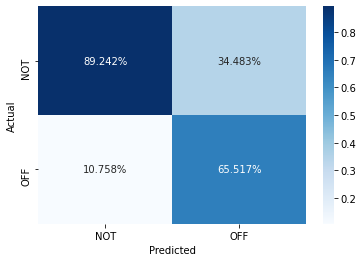

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

In [38]:
'''test1=test_t2_mal
test1=test1.drop(['cleaned'],axis=1)
y_pred=lr.predict(x_test)
test1['label']=y_pred
test1.to_csv('t2_mal_lr.tsv',sep='\t')
print(len(test1))

test1.head()'''

"test1=test_t2_mal\ntest1=test1.drop(['cleaned'],axis=1)\ny_pred=lr.predict(x_test)\ntest1['label']=y_pred\ntest1.to_csv('t2_mal_lr.tsv',sep='\t')\nprint(len(test1))\n\ntest1.head()"

In [39]:
svm_clf=SVC(kernel='linear',probability=True)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_dev)
print(classification_report(y_dev, y_pred,digits=4))

              precision    recall  f1-score   support

         NOT     0.9910    0.9975    0.9942      4724
   NOT-TAMIL     1.0000    1.0000    1.0000         3
         OFF     0.9893    0.9627    0.9758      1153

    accuracy                         0.9906      5880
   macro avg     0.9934    0.9867    0.9900      5880
weighted avg     0.9906    0.9906    0.9906      5880



              precision    recall  f1-score   support

         NOT      0.887     0.938     0.912       536
         OFF      0.621     0.458     0.527       118

    accuracy                          0.852       654
   macro avg      0.754     0.698     0.719       654
weighted avg      0.839     0.852     0.843       654



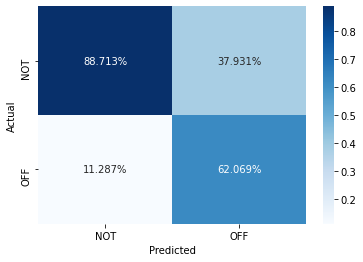

In [40]:
y_pred = svm_clf.predict(x_test)
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

In [41]:
'''test1=test_t2_mal
test1=test1.drop(['cleaned'],axis=1)
y_pred=svm_clf.predict(x_test)
test1['label']=y_pred
test1.to_csv('t2_mal_lsvc.tsv',sep='\t')
print(len(test1))

test1.head()'''

"test1=test_t2_mal\ntest1=test1.drop(['cleaned'],axis=1)\ny_pred=svm_clf.predict(x_test)\ntest1['label']=y_pred\ntest1.to_csv('t2_mal_lsvc.tsv',sep='\t')\nprint(len(test1))\n\ntest1.head()"

In [42]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_dev)
print(classification_report(y_dev, y_pred,digits=4))

              precision    recall  f1-score   support

         NOT     0.9989    0.9998    0.9994      4724
   NOT-TAMIL     1.0000    1.0000    1.0000         3
         OFF     0.9991    0.9957    0.9974      1153

    accuracy                         0.9990      5880
   macro avg     0.9994    0.9985    0.9989      5880
weighted avg     0.9990    0.9990    0.9990      5880



              precision    recall  f1-score   support

         NOT      0.853     0.981     0.912       536
         OFF      0.730     0.229     0.348       118

    accuracy                          0.846       654
   macro avg      0.791     0.605     0.630       654
weighted avg      0.830     0.846     0.811       654



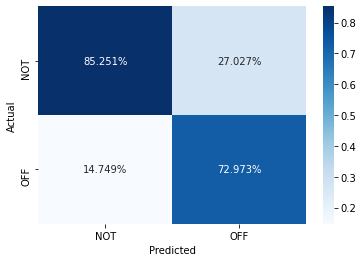

In [43]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

In [44]:
'''test1=test_t2_mal
test1=test1.drop(['cleaned'],axis=1)
y_pred=model.predict(x_test)
test1['label']=y_pred
test1.to_csv('t2_mal_rfc.tsv',sep='\t')
print(len(test1))

test1.head()'''

"test1=test_t2_mal\ntest1=test1.drop(['cleaned'],axis=1)\ny_pred=model.predict(x_test)\ntest1['label']=y_pred\ntest1.to_csv('t2_mal_rfc.tsv',sep='\t')\nprint(len(test1))\n\ntest1.head()"

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from sklearn.linear_model import SGDClassifier



#mnb=MultinomialNB()
mlp=RandomForestClassifier(n_estimators=1000)
xgb_clf=SVC(kernel='linear',probability=True)
lr=LogisticRegression()
estimators=[('lr', lr), ('mlp', mlp),('xgb', xgb_clf)]
clf = VotingClassifier(estimators, voting='soft')
ensemble =clf


ensemble.fit(x_train, y_train)

y_pred = ensemble.predict(x_dev) 
print(classification_report(y_dev, y_pred,digits=4))

              precision    recall  f1-score   support

         NOT     0.9918    0.9987    0.9953      4724
   NOT-TAMIL     0.0000    0.0000    0.0000         3
         OFF     0.9947    0.9688    0.9815      1153

    accuracy                         0.9923      5880
   macro avg     0.6622    0.6558    0.6589      5880
weighted avg     0.9919    0.9923    0.9921      5880



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         NOT      0.875     0.968     0.919       536
         OFF      0.721     0.373     0.492       118

    accuracy                          0.861       654
   macro avg      0.798     0.671     0.706       654
weighted avg      0.847     0.861     0.842       654



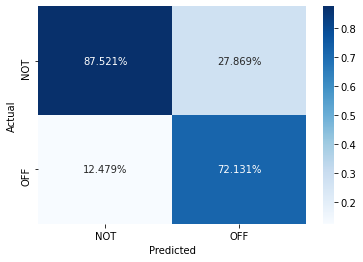

In [46]:
y_pred = ensemble.predict(x_test) 
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

In [ ]:
'''test1=test_t2_mal
test1=test1.drop(['cleaned'],axis=1)
y_pred=ensemble.predict(x_test)
test1['label']=y_pred
test1.to_csv('t2_mal_ensemble.tsv',sep='\t')
print(len(test1))

test1.head()'''

999


,ID,Tweets,label
0,MA_YT6001,athe beharyku deputationil pokam pinarai vijay...,NOT
1,MA_YT6002,USER cheruparamadathil than thinnunnath alla p...,NOT
2,MA_YT6003,USER cheruparamadathilpinaraayi shournuril oru...,NOT
3,MA_YT6004,USER vk pinarai thinnunnathu ninte okke theett...,OFF
4,MA_YT6005,USER george thante ammade poottile pooda kalay...,OFF


# Tamil *task2*

In [56]:
tr=train_t2_tamil
dev=dev_t2_tamil
te=test_t2_tamil

y_train=[x.upper() for x in tr.category]
y_dev=[x.upper() for x in dev.Labels]
y_test=[x.strip() for x in te.category]


sentences=list(tr.cleaned)
from scipy.sparse import hstack
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 3),
    max_features=40000)
word_vectorizer.fit(sentences)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(2, 5),
    max_features=40000)
char_vectorizer.fit(sentences)



train_word_features = word_vectorizer.transform(tr.cleaned)
dev_word_features = word_vectorizer.transform(dev.cleaned)
test_word_features = word_vectorizer.transform(te.cleaned)


train_char_features = char_vectorizer.transform(tr.cleaned)
dev_char_features = char_vectorizer.transform(dev.cleaned)
test_char_features = char_vectorizer.transform(te.cleaned)




x_train = hstack([train_char_features, train_word_features])#,train_sn_features])
x_dev=hstack([dev_char_features, dev_word_features])
x_test = hstack([test_char_features, test_word_features])#,test_sn_features])


         
x_train.shape,x_dev.shape,x_test.shape

((3999, 80000), (940, 80000), (1000, 80000))

In [57]:
lr=LogisticRegression(C=30)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_dev) 
print(classification_report(y_dev, y_pred,digits=4))

              precision    recall  f1-score   support

         NOT     0.8845    0.8731    0.8788       465
         OFF     0.8773    0.8884    0.8828       475

    accuracy                         0.8809       940
   macro avg     0.8809    0.8808    0.8808       940
weighted avg     0.8809    0.8809    0.8808       940



              precision    recall  f1-score   support

         NOT      0.714     0.798     0.754       605
         OFF      0.623     0.511     0.562       395

    accuracy                          0.685      1000
   macro avg      0.669     0.655     0.658      1000
weighted avg      0.679     0.685     0.678      1000



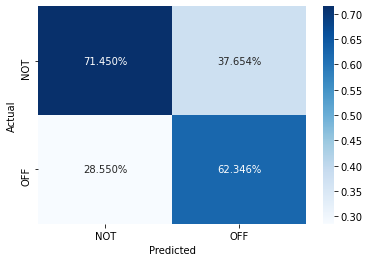

In [58]:
y_pred = lr.predict(x_test) 
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

              precision    recall  f1-score   support

         NOT      0.874     0.849     0.862       465
         OFF      0.857     0.880     0.868       475

    accuracy                          0.865       940
   macro avg      0.865     0.865     0.865       940
weighted avg      0.865     0.865     0.865       940

              precision    recall  f1-score   support

         NOT      0.707     0.782     0.743       605
         OFF      0.601     0.504     0.548       395

    accuracy                          0.672      1000
   macro avg      0.654     0.643     0.645      1000
weighted avg      0.665     0.672     0.666      1000



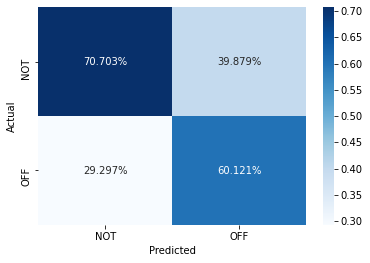

In [59]:
svm_clf=SVC(kernel='linear',probability=True)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_dev)
print(classification_report(y_dev, y_pred,digits=3))

y_pred = svm_clf.predict(x_test)
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

              precision    recall  f1-score   support

         NOT     0.9051    0.8000    0.8493       465
         OFF     0.8242    0.9179    0.8685       475

    accuracy                         0.8596       940
   macro avg     0.8647    0.8589    0.8589       940
weighted avg     0.8642    0.8596    0.8590       940

              precision    recall  f1-score   support

         NOT      0.696     0.613     0.652       605
         OFF      0.499     0.590     0.541       395

    accuracy                          0.604      1000
   macro avg      0.597     0.602     0.596      1000
weighted avg      0.618     0.604     0.608      1000



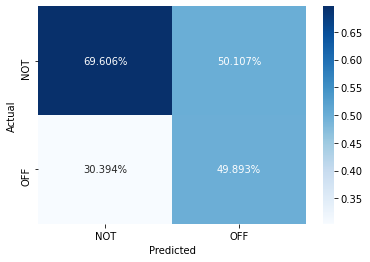

In [60]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_dev)
print(classification_report(y_dev, y_pred,digits=4))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

              precision    recall  f1-score   support

         NOT     0.8939    0.8516    0.8722       465
         OFF     0.8612    0.9011    0.8807       475

    accuracy                         0.8766       940
   macro avg     0.8775    0.8763    0.8765       940
weighted avg     0.8774    0.8766    0.8765       940

              precision    recall  f1-score   support

         NOT      0.723     0.767     0.744       605
         OFF      0.606     0.549     0.576       395

    accuracy                          0.681      1000
   macro avg      0.664     0.658     0.660      1000
weighted avg      0.677     0.681     0.678      1000



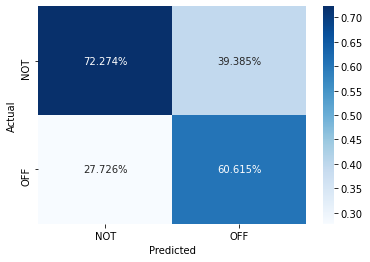

In [61]:
ensemble.fit(x_train, y_train)

y_pred = ensemble.predict(x_dev) 
print(classification_report(y_dev, y_pred,digits=4))

y_pred = ensemble.predict(x_test) 
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

# Mal task2

In [67]:
tr=train_t2_mal
dev=dev_t2_mal
te=test_t2_mal

y_train=[x.upper() for x in tr.Labels]
y_dev=[x.upper() for x in dev.Labels]
yy=[]
for i in  te.Labels:
  if i == 'HOF': i='OFF'
  yy.append(i)
y_test=yy#[x.strip() for x in te.Labels]


sentences=list(tr.cleaned)
from scipy.sparse import hstack
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 3),
    max_features=40000)
word_vectorizer.fit(sentences)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(2, 5),
    max_features=40000)
char_vectorizer.fit(sentences)



train_word_features = word_vectorizer.transform(tr.cleaned)
dev_word_features = word_vectorizer.transform(dev.cleaned)
test_word_features = word_vectorizer.transform(te.cleaned)


train_char_features = char_vectorizer.transform(tr.cleaned)
dev_char_features = char_vectorizer.transform(dev.cleaned)
test_char_features = char_vectorizer.transform(te.cleaned)




x_train = hstack([train_char_features, train_word_features])#,train_sn_features])
x_dev=hstack([dev_char_features, dev_word_features])
x_test = hstack([test_char_features, test_word_features])#,test_sn_features])


         
x_train.shape,x_dev.shape,x_test.shape

((3999, 80000), (951, 80000), (999, 80000))

              precision    recall  f1-score   support

         NOT     0.7381    0.7865    0.7615       473
         OFF     0.7740    0.7238    0.7481       478

    accuracy                         0.7550       951
   macro avg     0.7561    0.7552    0.7548       951
weighted avg     0.7562    0.7550    0.7548       951

              precision    recall  f1-score   support

         NOT      0.848     0.744     0.792       675
         OFF      0.575     0.722     0.640       324

    accuracy                          0.737       999
   macro avg      0.711     0.733     0.716       999
weighted avg      0.759     0.737     0.743       999



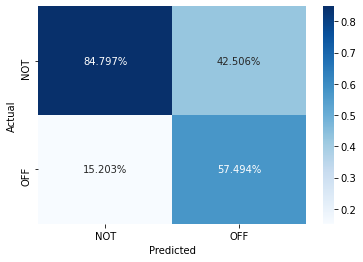

In [68]:
lr=LogisticRegression(C=30)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_dev) 
print(classification_report(y_dev, y_pred,digits=4))

y_pred = lr.predict(x_test) 
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()



              precision    recall  f1-score   support

         NOT      0.723     0.799     0.759       473
         OFF      0.778     0.697     0.735       478

    accuracy                          0.748       951
   macro avg      0.750     0.748     0.747       951
weighted avg      0.751     0.748     0.747       951

              precision    recall  f1-score   support

         NOT      0.848     0.720     0.779       675
         OFF      0.556     0.731     0.632       324

    accuracy                          0.724       999
   macro avg      0.702     0.726     0.705       999
weighted avg      0.754     0.724     0.731       999



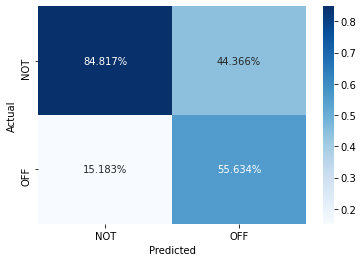

In [69]:
svm_clf=SVC(kernel='linear',probability=True)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_dev)
print(classification_report(y_dev, y_pred,digits=3))

y_pred = svm_clf.predict(x_test)
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

              precision    recall  f1-score   support

         NOT     0.7393    0.8753    0.8015       473
         OFF     0.8491    0.6946    0.7641       478

    accuracy                         0.7844       951
   macro avg     0.7942    0.7849    0.7828       951
weighted avg     0.7945    0.7844    0.7827       951

              precision    recall  f1-score   support

         NOT      0.832     0.807     0.820       675
         OFF      0.622     0.660     0.641       324

    accuracy                          0.760       999
   macro avg      0.727     0.734     0.730       999
weighted avg      0.764     0.760     0.762       999



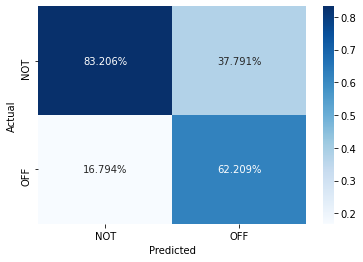

In [70]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_dev)
print(classification_report(y_dev, y_pred,digits=4))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()

              precision    recall  f1-score   support

         NOT     0.7481    0.8414    0.7920       473
         OFF     0.8210    0.7197    0.7670       478

    accuracy                         0.7802       951
   macro avg     0.7846    0.7806    0.7795       951
weighted avg     0.7848    0.7802    0.7795       951

              precision    recall  f1-score   support

         NOT      0.853     0.759     0.803       675
         OFF      0.591     0.728     0.653       324

    accuracy                          0.749       999
   macro avg      0.722     0.743     0.728       999
weighted avg      0.768     0.749     0.754       999



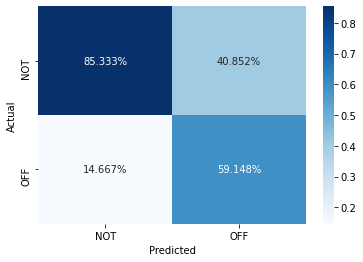

In [71]:
ensemble.fit(x_train, y_train)

y_pred = ensemble.predict(x_dev) 
print(classification_report(y_dev, y_pred,digits=4))

y_pred = ensemble.predict(x_test) 
print(classification_report(y_test, y_pred,digits=3))

data = {'y_Actual':  y_test  ,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,fmt='.3%', cmap='Blues')
plt.show()